In [1]:
!pip install pennylane
!pip install numpy
!pip install pandas
!pip install scikit-learn

In [2]:
!pip install matplotlib

Classical Machine Learning Accuracy: 1.0
Quantum Machine Learning Accuracy: 0.35


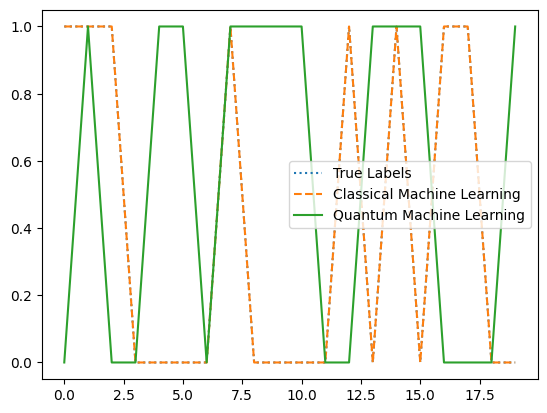

Classical Machine Learning outperforms Quantum Machine Learning!


In [3]:
# Problem Statement:
# This code aims to compare the performance of Classical Machine Learning (SVM) and Quantum Machine Learning (QSVM) on the Iris dataset. The goal is to implement both models, train them on the dataset, and evaluate their classification accuracy.
# Objective:
# To convert the Qiskit-based Quantum Support Vector Machine (QSVM) part of the code into PennyLane while retaining the classical SVM implementation.
# Perform binary classification on the Iris dataset and compare the results of Classical Machine Learning (SVM) and Quantum Machine Learning (Quantum Kernel-based SVM in PennyLane).
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Binary classification - only take 2 classes
X = X[y != 2]
y = y[y != 2]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Classical Machine Learning (SVM)
svm = SVC(kernel='linear', C=1)
svm.fit(X_train, y_train)
y_pred_cml = svm.predict(X_test)
accuracy_cml = accuracy_score(y_test, y_pred_cml)
print("Classical Machine Learning Accuracy:", accuracy_cml)

# Quantum Machine Learning (Quantum Kernel-based SVM in PennyLane)

# Create a quantum device
n_qubits = 4
dev = qml.device("default.qubit", wires=n_qubits)

# Define the quantum feature map (circuit)
def quantum_kernel(x1, x2):
    @qml.qnode(dev)
    def circuit(x1, x2):
        qml.templates.AngleEmbedding(x1, wires=range(n_qubits))
        qml.templates.AngleEmbedding(x2, wires=range(n_qubits))
        qml.CNOT(wires=[0, 1])
        qml.CNOT(wires=[1, 2])
        qml.CNOT(wires=[2, 3])
        return qml.expval(qml.PauliZ(0))
    
    return circuit(x1, x2)

# Compute the quantum kernel matrix
def kernel_matrix(X1, X2):
    kernel_mat = np.zeros((X1.shape[0], X2.shape[0]))
    for i in range(X1.shape[0]):
        for j in range(X2.shape[0]):
            kernel_mat[i, j] = quantum_kernel(X1[i], X2[j])
    return kernel_mat

# Train a classical SVM using the quantum kernel matrix
X_train_kernel = kernel_matrix(X_train, X_train)
qsvm = SVC(kernel='precomputed')
qsvm.fit(X_train_kernel, y_train)

# Compute the kernel matrix for the test set
X_test_kernel = kernel_matrix(X_test, X_train)
y_pred_qml = qsvm.predict(X_test_kernel)
accuracy_qml = accuracy_score(y_test, y_pred_qml)
print("Quantum Machine Learning Accuracy:", accuracy_qml)

# Plot the results
plt.plot(y_test, label='True Labels', linestyle='dotted')
plt.plot(y_pred_cml, label='Classical Machine Learning', linestyle='dashed')
plt.plot(y_pred_qml, label='Quantum Machine Learning', linestyle='solid')
plt.legend()
plt.show()

# Compare the accuracy of CML and QML
if accuracy_qml > accuracy_cml:
    print("Quantum Machine Learning outperforms Classical Machine Learning!")
else:
    print("Classical Machine Learning outperforms Quantum Machine Learning!")
